<a href="https://colab.research.google.com/github/dongheumLee/minkim1423.github.io/blob/main/Heart_Disease_Prediction_using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## WHO에서 매년 심장 질환으로 전 세계적으로 약 1200만명의 사망자가 나타나는 것으로 추정
## 미국과 다른 선진국에서 사망자의 절반은 심혈관 질환으로 인한 것으로 추정됨
## 심혈관 질환의 조기 예후는 생활 습관 변화에 따른 결정을 내리는데 도움을 주면서 합병증을 줄이는데 도움이 됨
## 이 예시는 심혈관 질환의 조기 예후를 보는데 로지스틱 회귀분석을 이용해 예측 심장 질환에 관련이 이는 위험 요소를 알아 보려는 것이 목적이다

In [ ]:
## 분석하는데 필요한  Python 프로그래밍 언어로 작성된 소프트웨어 라이브러리를 import 한다 

import pandas as pd 
# 데이터 조작 및 분석을 위해 Python 프로그래밍 언어
import numpy as np
#  수치 해석을 위한 Python 프로그래밍 언어
import statsmodels.api as sm
# 데이터를 탐색하고 통계 모델을 추정 통계 테스트를 추정하는 python의 패키지
import scipy.stats as st
import matplotlib.pyplot as plt
# 파이썬에서 matlab과 유사한 그래프를 가능하게 하는 라이브러리 패키지
# matlab : MathWorks 사에서 개발한 수치 해석 및 프로그래밍 환경을 제공하는 공학용 소프트웨어
import seaborn as sn
# matplotlib에서 기반된 python 데이터 시각화 라이브러리

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
## Source의 출처
 # 이 데이터 세트의 출처는 kaggle의 웹사이트
 # 데이터 세트의 Raw 데이터는 메사추세츠 프레이밍 햄 지역의 주민들을 대상으로 진행중인 심혈관 연구에서 나옴
 # 데이터 세트는 환자의 정보를 제공하고 있으며 약 4240여개의 row와 16개의 퀄럼이 존재함


In [ ]:
url='https://raw.githubusercontent.com/dongheumLee/minkim1423.github.io/main/framingham.csv'
heart_df=pd.read_csv(url)
print(heart_df)

      male  age  education  ...  heartRate  glucose  TenYearCHD
0        1   39        4.0  ...       80.0     77.0           0
1        0   46        2.0  ...       95.0     76.0           0
2        1   48        1.0  ...       75.0     70.0           0
3        0   61        3.0  ...       65.0    103.0           1
4        0   46        3.0  ...       85.0     85.0           0
...    ...  ...        ...  ...        ...      ...         ...
4235     0   48        2.0  ...       84.0     86.0           0
4236     0   44        1.0  ...       86.0      NaN           0
4237     0   52        2.0  ...       80.0    107.0           0
4238     1   40        3.0  ...       67.0     72.0           0
4239     0   39        3.0  ...       85.0     80.0           0

[4240 rows x 16 columns]


In [ ]:
## 심혈관 질환에 있어서 의학적 요인만을 보기 위해 education을 삭제함

url='https://raw.githubusercontent.com/dongheumLee/minkim1423.github.io/main/framingham.csv'
heart_df=pd.read_csv(url)
heart_df.drop(['education'],axis=1,inplace=True)
print(heart_df)


      male  age  currentSmoker  ...  heartRate  glucose  TenYearCHD
0        1   39              0  ...       80.0     77.0           0
1        0   46              0  ...       95.0     76.0           0
2        1   48              1  ...       75.0     70.0           0
3        0   61              1  ...       65.0    103.0           1
4        0   46              1  ...       85.0     85.0           0
...    ...  ...            ...  ...        ...      ...         ...
4235     0   48              1  ...       84.0     86.0           0
4236     0   44              1  ...       86.0      NaN           0
4237     0   52              0  ...       80.0    107.0           0
4238     1   40              0  ...       67.0     72.0           0
4239     0   39              1  ...       85.0     80.0           0

[4240 rows x 15 columns]


In [ ]:
heart_df.info()
## info는 데이터에 대한 전반적인 정보를 나타내며. heart_df 를 구성하는 
## 행과 열의 크기, 컬럼명, 컬럼을 구성하는 값의 자료형 등을 출력함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4211 non-null   float64
 4   BPMeds           4187 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4190 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          3852 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


In [ ]:
## 변수 설명
## 각 속성들은 인구 통계학적인 것과 행동적 의학적 요인이 모두 존재함
  # sex: 남자 and 여자로 이뤄짐 1= 남자 0 = 여자
  # age : 환자의 나이
  # Current Smoker: 현재 담배를 피고 있는지 확인 흡연가 = 1 비흡연가 = 0
  # Cigs Per Day: 담배를 피는 사람이 평균적으로 피운 담배의 갯수
  # BPMeds : 환자가 혈압 약을 복용했는지 알아봄 혈압약 복용 = 1 혈압약 비복용 = 0 
  # prevalentStroke : 환자가 이전에 뇌졸증을 않았는지 알아봄 뇌졸증 경험자 = 1, 뇌졸증 비경험자 = 0
  # prevalentHyp :  환자가 고혈압인지의 여부 고혈압 환자 : 1 비고혈압환자 : 0
  # diabetes : 환자가 당뇨병을 앓았는지 여부 당뇨병 앓은 환자 : 1 당뇨병 앓지 않은 환자 : 0
  # totChol : 총 콜레스트롤 수치 
  # sysBP : 이완기 혈압
  # BMI : 체질량 지수
  # heartRate : 심박수
  # TenYearCHD : 관상 동맥 심장 질환 10년간의 위험 있음 = 1 없음 = 0



In [ ]:
heart_df.head()
## head는 데이터위 상위 5개의 행을 출력함
## 만일 괄호 안에 숫자를 넣게 되면 그 숫자만큼 행을 출력함


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
heart_df.shape
## heart_df 데이터의 (행과 열)의 크기를 출력함
## 본 데이터는 4240개의 행과 15개의 열로 되어 있음을 확인 할 수 있음

(4240, 15)

In [ ]:
heart_df.describe()
## heart_df 데이터의 기초통계량을 알 수 있음 


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
heart_df['age'].mean()
## age의 평균 나이


49.58018867924528

In [ ]:
heart_df['age'].max()
## age의 최고 나이


70

In [ ]:
heart_df['age'].min()
## age의 최소 나이

32

In [ ]:
## 누락된 값을 확인
 # 데이터가 수집이 되지 않았을 경우나 다수의 Datafame을 병합하는 과정에서 생길 수 있는 과정에서 생김
 # 이러한 오류는 데이터를 분석하는데 있어서 오류가 생기게 함
 # 아래의 Dataflame에도 null 값이 존재함을 알 수가 있었음

heart_df.isnull()


  

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4237,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4238,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
## dataflame의 null값이 나온 것을 합해서 얼마나 나왔는지 확인을 해 보자
  # cigsPerDay 29개
  # BPMeds 53개
  # totChol 50개
  # BMI 19개
  # heartRate 1개
  # glucose   388개         


heart_df.isnull().sum()


male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:

heart_df.dropna(axis=1,inplace=True)
## dataflame의 null값이 나온 것을 합해서 얼마나 나왔는지 확인을 한 후 결과 값을 삭제하도록 해 보자
heart_df.isnull().sum()
## dataflame의 null값이 나온 것을 확인 하자

male               0
age                0
currentSmoker      0
prevalentStroke    0
prevalentHyp       0
diabetes           0
sysBP              0
diaBP              0
TenYearCHD         0
dtype: int64

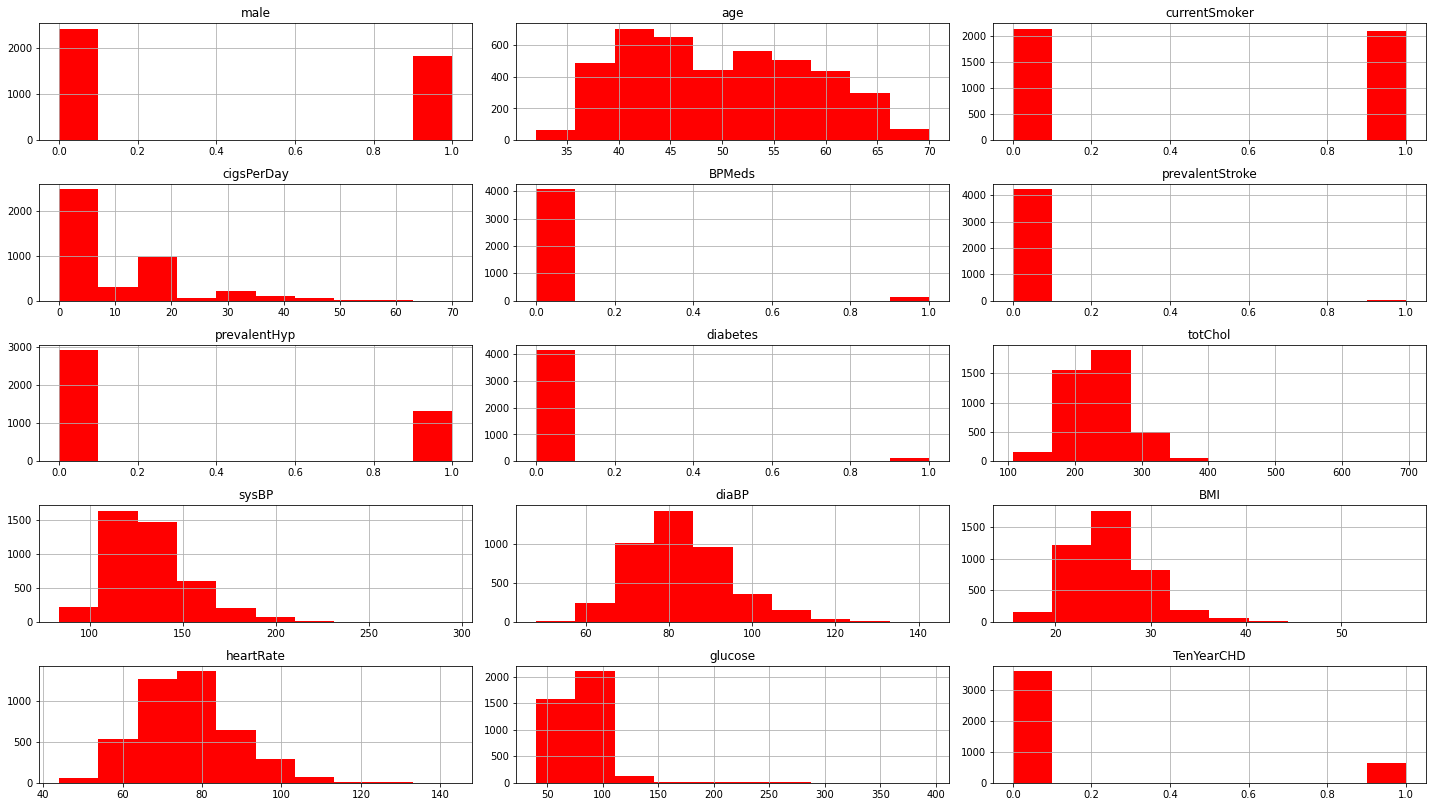

In [ ]:
def draw_histograms(dataframe,features,rows,cols):  
  fig=plt.figure(figsize=(20,20))
  for i, feature in enumerate(features) :
    ax= fig.add_subplot(rows,cols,i+1)
    dataframe[feature].hist(bins=10,ax=ax,facecolor='red')
    ax.set_title(feature,color='black')

  fig.tight_layout()
  plt.show()
draw_histograms(heart_df,heart_df.columns,9,3)


In [ ]:
heart_df.TenYearCHD.value_counts(False)

0    3596
1     644
Name: TenYearCHD, dtype: int64

In [ ]:
heart_df.TenYearCHD.value_counts(True)

0    0.848113
1    0.151887
Name: TenYearCHD, dtype: float64

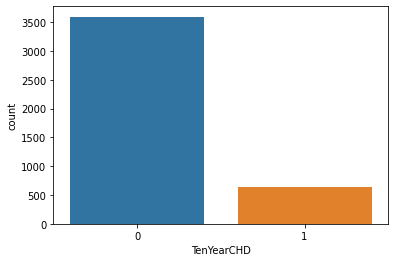

In [ ]:
sn.countplot(x='TenYearCHD',data=heart_df)

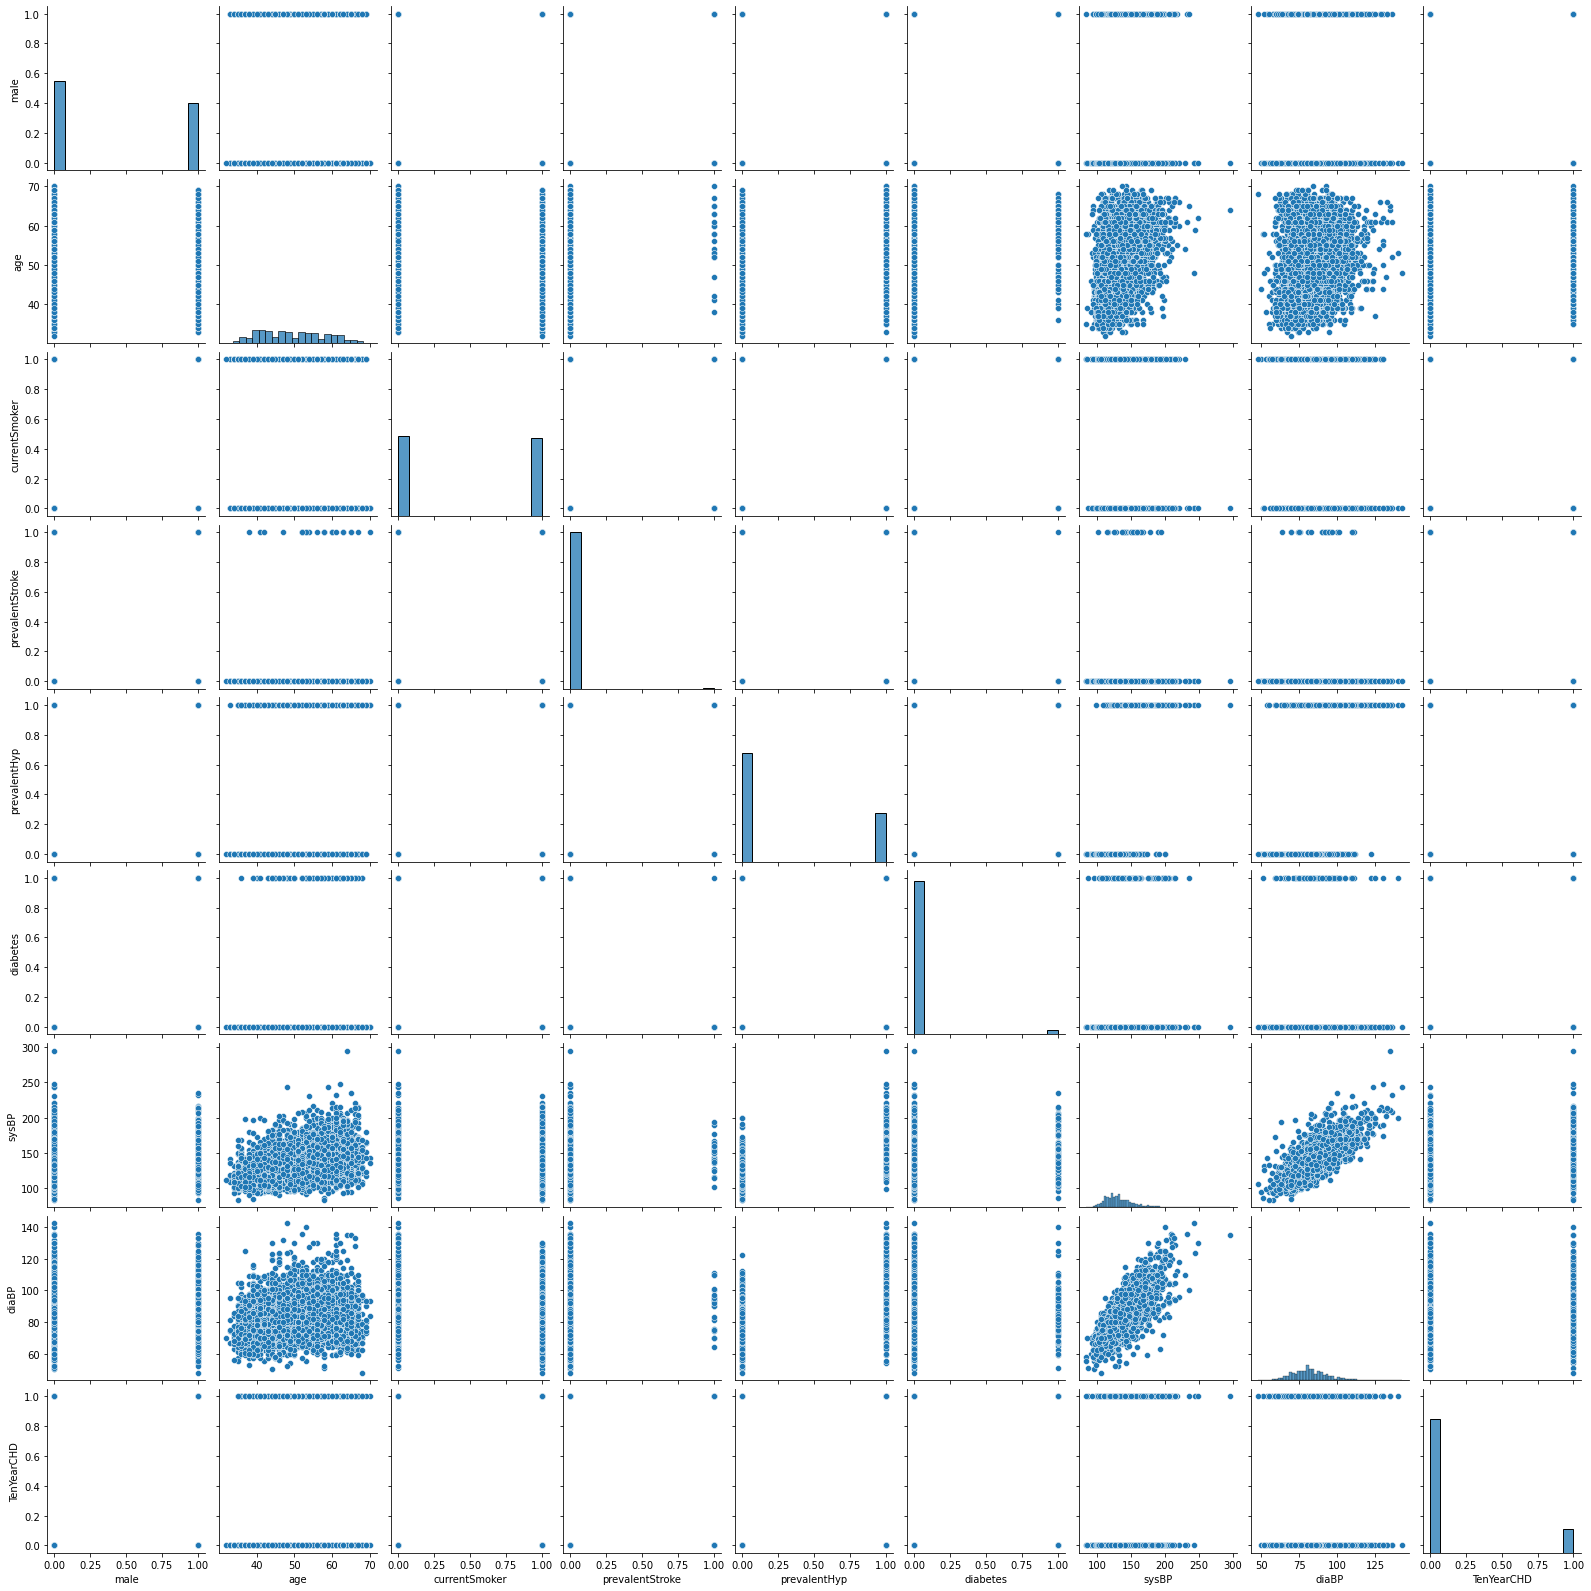

In [ ]:
sn.pairplot(data=heart_df)
plt.show()

In [ ]:
## Logistic regression은 범주 형 종속 변수의 결과를 예측하는데 사용되는 통계의 회귀 분석 유형
## 로지스틱 회귀에서 종속 변수는 항상 이진수의 모습을 띄고 있는 특징을 보이고 있다
## 주로 예측 및 성공 확률 계산에 이용되고 있음 

from statsmodels.tools import add_constant as add_constant
heart_df_constant = add_constant(heart_df)
heart_df_constant.tail() 

,const,male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,TenYearCHD
4235,1.0,0,48,1,0,0,0,131.0,72.0,0
4236,1.0,0,44,1,0,0,0,126.5,87.0,0
4237,1.0,0,52,0,0,0,0,133.5,83.0,0
4238,1.0,1,40,0,0,1,0,141.0,98.0,0
4239,1.0,0,39,1,0,0,0,133.0,86.0,0


In [ ]:
st.chisqprob = lambda chisq, df: chi2.sf(chisq,sf)
cols=heart_df_constant.columns[:-1]
model=sm.Logit(heart_df.TenYearCHD,heart_df_constant[cols])
result= model.fit()
result.summary()

## 아래의 결과가 고혈압 질환을 가진 사람의 p-value가 5% 보다 높은 모습을 보임
  # 통계적으로 유의한 관계가 낮음
  # 모든 속성이 5% 보다 낮은 P-value 값을 가질 때까지 회귀분석을 반복적으로 해서 p 값을 가진 속성을 제거하는 방식을 시도

Optimization terminated successfully.
         Current function value: 0.381837
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4231
Method:                           MLE   Df Model:                            8
Date:                Sun, 18 Apr 2021   Pseudo R-squ.:                  0.1036
Time:                        06:13:34   Log-Likelihood:                -1619.0
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 6.051e-76
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.3302      0.490    -14.949      0.000      -8.291      -6.369
male                0.5723      0.094      6.056      0.000       0.387       0.758
age                 0.0616      0.006     10.203      0.000       0.050       0.073
currentSmoker       0.3835      0.096      3.997      0.000       0.195       0.571
prevalentStroke     1.0043      0.437      2.300      0.021       0.148       1.860
prevalentHyp        0.2425      0.127      1.908      0.056      -0.007       0.492
diabetes            0.7762      0.217      3.577      0.000       0.351       1.201
sysBP               0.0157      0.003      4.507      0.000       0.009       0.023
diaBP              -0.0036      0.006     -0.619      0.536      -0.015       0.008
===================================================================================
"""

In [ ]:
def back_feature_elem (data_frame,dep_var,col_list):
    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(heart_df_constant,heart_df.TenYearCHD,cols)

# 모든 속성이 5% 보다 낮은 P-value 값을 가질 때까지 if ~ else절을 이용
  # 회귀분석을 반복적으로 해서 p 값을 가진 속성을 제거함

In [ ]:
result.summary()
# p-value가 0.05보다 작은 결과로 통계적으로 유의하게 되었으며 그 결과로 로지스틱 회귀를 돌린 결과

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4233
Method:                           MLE   Df Model:                            6
Date:                Sun, 18 Apr 2021   Pseudo R-squ.:                  0.1026
Time:                        07:55:52   Log-Likelihood:                -1620.8
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 6.083e-77
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.8527      0.375    -20.931      0.000      -8.588      -7.117
male                0.5709      0.093      6.107      0.000       0.388       0.754
age                 0.0629      0.006     10.721      0.000       0.051       0.074
currentSmoker       0.3828      0.096      4.001      0.000       0.195       0.570
prevalentStroke     1.0480      0.436      2.406      0.016       0.194       1.902
diabetes            0.7810      0.217      3.603      0.000       0.356       1.206
sysBP               0.0175      0.002      8.802      0.000       0.014       0.021
===================================================================================
"""

In [ ]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
print((conf))

                        0         1
const            0.000186  0.000811
male             1.473539  2.125730
age              1.052732  1.077217
currentSmoker    1.215624  1.768705
prevalentStroke  1.214419  6.697227
diabetes         1.427784  3.339459
sysBP            1.013727  1.021676


In [ ]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue = round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)','CI 95%(97.5%)', 'Odds Ratio', 'pvalue']
print((conf)) 

                 CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const                0.000186       0.000811    0.000389   0.000
male                 1.473539       2.125730    1.769844   0.000
age                  1.052732       1.077217    1.064904   0.000
currentSmoker        1.215624       1.768705    1.466315   0.000
prevalentStroke      1.214419       6.697227    2.851884   0.016
diabetes             1.427784       3.339459    2.183581   0.000
sysBP                1.013727       1.021676    1.017694   0.000


In [ ]:
## 결과를 통해 알 수가 있는 것
  # 1= 남성이 심장 질환 진단을 받을 확률 여성에 비해 1.769844 임을 보여주며 변화율 측면에서 남성이 여성 보다 76% 심장질환 판단을 받을 확률이 높다는  것을 알 수가 있다
  # 연령에 대해서 다른 계수를 일정하게 유지한다고 가정하면 1년 동안 연령이 증가하는 동안 심장질환을 받을 확률이 7% (1.0694904) 증가 한다는 것을 알수가 있다
  # 뇌졸증을 경험한 사람은 심장질환에 걸릴 확률이 안 걸릴 사람에 비해 약 2.9배 정도 높다
  # 수축기의 혈압도  1단위 증가 할 때 마다 1.017 % 한다 
  

# 새 섹션

# 새 섹션